## MOwNiT - laboratorium 9
### Regresja liniowa z regularyzacją
https://github.com/piotrMocz/mownit2/blob/master/Lab6.ipynb

### Duże zadanie/mały projekt
Zadanie jest z gatunku życiowych, tudzież: przydatnych w karierze zawodowej, więc warto go nie lekceważyć. Będziemy chcieli zrobić coś, co jest chlebem powszednim data scientistów:

0. znaleźć dane
1. wczytać dane do data frame'u
2. wstępnie opisać dane i ew. uzupełnić brakujące
3. narysować wykresy i wypisać podstawowe statystyki
4. wstępnie przetworzyć dane
5. wytrenować modele (zwykła regresja, Lasso, Ridge i dowolny inny model) i sprawdzić ich wydajność

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, metrics
from pandas import Series
from pandas import DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

#### 0. Znalezienie danych
Liczba dostępnych w Internecie zbiorów danych jest ogromna. 
Ostatecznie zdecydowałem się wykorzystać dane z linkowanego Kaggle'a, tj. https://www.kaggle.com/apapiu/regularized-linear-models/data

(disclaimer: świetna strona, multum danych - https://archive.ics.uci.edu/ml/datasets.html)

#### 1. Ładowanie danych

In [2]:
# read data into a DataFrame
data = pd.read_csv('house_prices_kaggle.csv', index_col = 0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# print the shape of the DataFrame
data.shape

(1460, 80)

#### 2. Wstępne opisanie danych i brakujące wartości

In [4]:
data.describe(include = 'all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


Postanowiłem wybrać do dalszej analizy kilka z 80 parametrów danych. Dzięki temu uniknę potencjalnych problemów z brakującymi wartościami.

In [5]:
df = data[['LotArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']]
df.describe()

,LotArea,GarageYrBlt,GarageArea,SalePrice
count,1460.000000,1379.000000,1460.000000,1460.000000
mean,10516.828082,1978.506164,472.980137,180921.195890
std,9981.264932,24.689725,213.804841,79442.502883
min,1300.000000,1900.000000,0.000000,34900.000000
25%,7553.500000,1961.000000,334.500000,129975.000000
50%,9478.500000,1980.000000,480.000000,163000.000000
75%,11601.500000,2002.000000,576.000000,214000.000000
max,215245.000000,2010.000000,1418.000000,755000.000000


#### 3. Rysowanie wykresów
Dla wybranych parametrów analizuję histogramy, usuwam outliery i logarytmuję wartości, aby uzyskać lepszy rozkład.

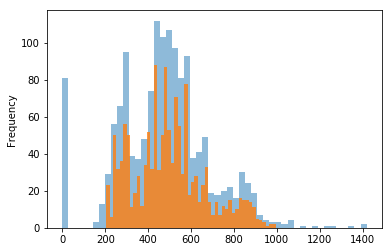

In [6]:
df['GarageArea'].plot.hist(bins = 50, alpha = 0.5)
df = df[(df.GarageArea < 1000) & (df.GarageArea > 200)]
df['GarageArea'].plot.hist(bins = 50, alpha = 0.8)

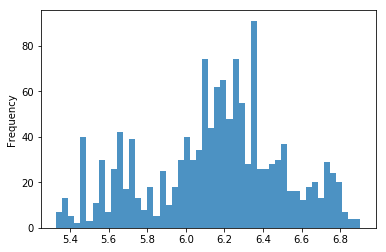

In [7]:
df['GarageArea'] = np.log1p(df['GarageArea'])
df['GarageArea'].plot.hist(bins = 50, alpha = 0.8)

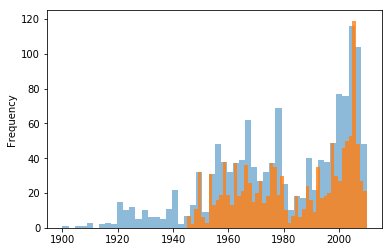

In [8]:
df['GarageYrBlt'].plot.hist(bins = 50, alpha = 0.5)
df = df[df.GarageYrBlt > 1944]
df['GarageYrBlt'].plot.hist(bins = 50, alpha = 0.8)

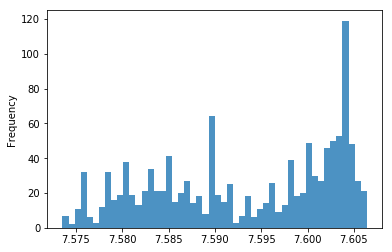

In [9]:
df['GarageYrBlt'] = np.log1p(df['GarageYrBlt'])
df['GarageYrBlt'].plot.hist(bins = 50, alpha = 0.8)

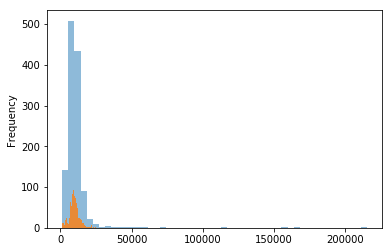

In [10]:
df['LotArea'].plot.hist(bins = 50, alpha = 0.5)
df = df[df.LotArea < 25000]
df['LotArea'].plot.hist(bins = 50, alpha = 0.8)

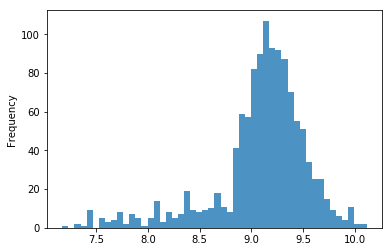

In [11]:
df['LotArea'] = np.log1p(df['LotArea'])
df['LotArea'].plot.hist(bins = 50, alpha = 0.8)

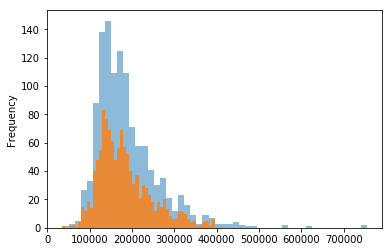

In [12]:
df['SalePrice'].plot.hist(bins = 50, alpha = 0.5)
df = df[df.SalePrice < 400000]
df['SalePrice'].plot.hist(bins = 50, alpha = 0.8)

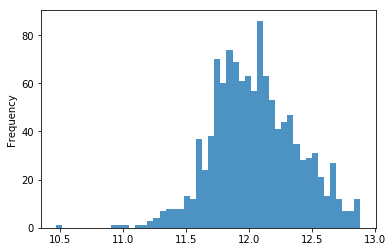

In [13]:
df['SalePrice'] = np.log1p(df['SalePrice'])
df['SalePrice'].plot.hist(bins = 50, alpha = 0.8)

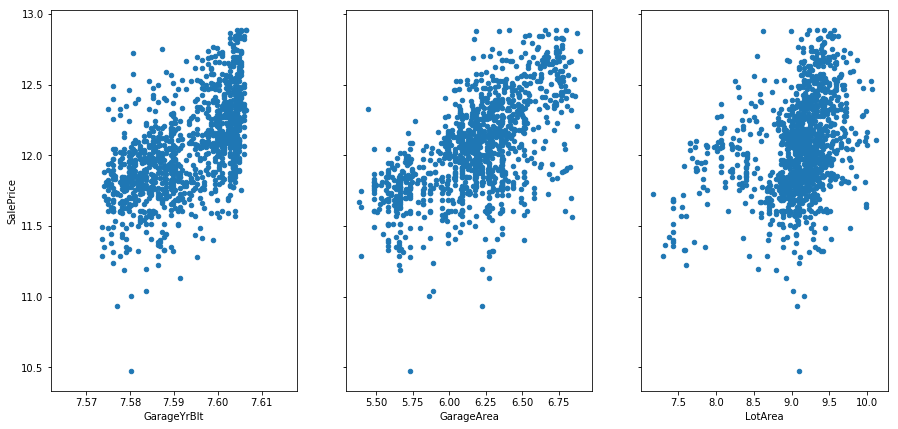

In [14]:
fig, axs = plt.subplots(1, 3, sharey = True)
df.plot(kind = 'scatter', x = 'GarageYrBlt', y = 'SalePrice', ax = axs[0], figsize=(15, 7))
df.plot(kind = 'scatter', x = 'GarageArea', y = 'SalePrice', ax = axs[1])
df.plot(kind = 'scatter', x = 'LotArea', y = 'SalePrice', ax = axs[2])

#### 4. Przetwarzanie danych

In [15]:
# normalizacja
from sklearn import preprocessing
df = DataFrame(preprocessing.normalize(df, norm = 'l2'))
df.head()

,0,1,2,3
0,0.498231,0.418932,0.347586,0.674868
1,0.507915,0.420382,0.339736,0.670732
2,0.507667,0.413716,0.348949,0.670334
3,0.509156,0.422263,0.359246,0.658329
4,0.511980,0.406863,0.360212,0.665271


#### 5. Trenowanie modeli